In [2]:
import sys
sys.path.append("../")
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.decomposition import PCA
from scipy.interpolate import griddata
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
import radialProfile, glob, cv2

def SPC(folder, input_size, number_iter = 8000, n = 8, invert = [1, 1, 1, 1]):
    spectrum_mat = np.zeros([number_iter, input_size*input_size])
    cnt = 0
    spectrum_f = np.zeros([input_size, input_size], dtype='float64')

    for filename in glob.glob(folder):
        img = cv2.imread(filename, 0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += 1e-8

        magnitude_spectrum = 20*np.log(np.abs(fshift))
        spectrum_f += magnitude_spectrum
        spectrum_mat[cnt,:] = magnitude_spectrum.flatten()
        cnt+=1
        
        if cnt == number_iter: break

    spectrum_mat -= np.mean(spectrum_mat) 
    spectrum_mat /= np.std(spectrum_mat) 
    pca = PCA(n_components=4, svd_solver='auto')
 
    pca.fit(spectrum_mat)
    print(pca.explained_variance_)
    
    fig, axes = plt.subplots(1, n, figsize=(27, 12),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        img = pca.components_[i].reshape(input_size, input_size)
        img *= invert[i]
        # ax.set_title("Explained Variance = " + str(math.ceil(pca.explained_variance_[i])), fontsize=24)
        ax.imshow(img, cmap='gray')

[790.0286605  117.24248203  54.89569446  33.11729965]
[592.43416979  69.66900503  40.45895249  29.88746039]


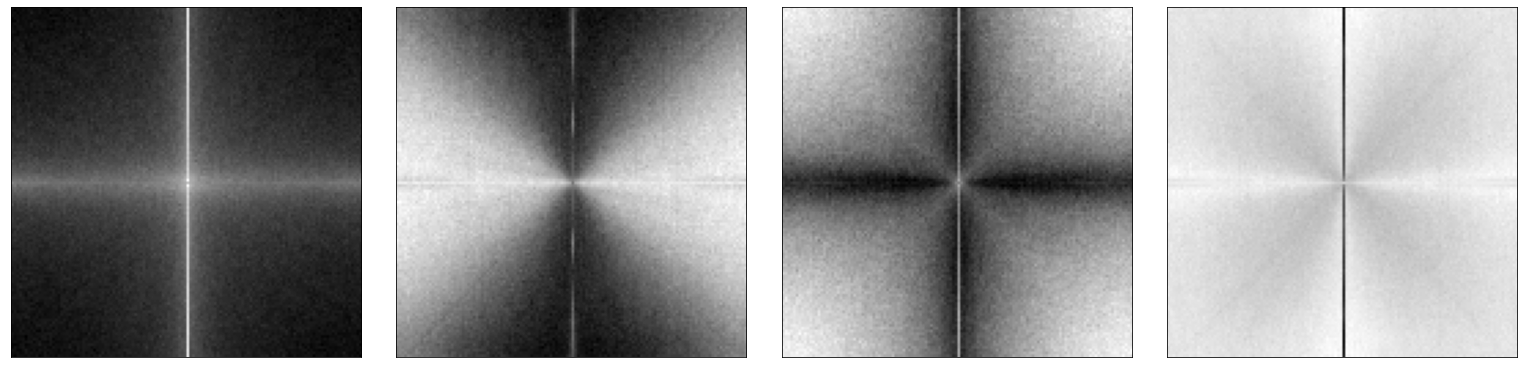

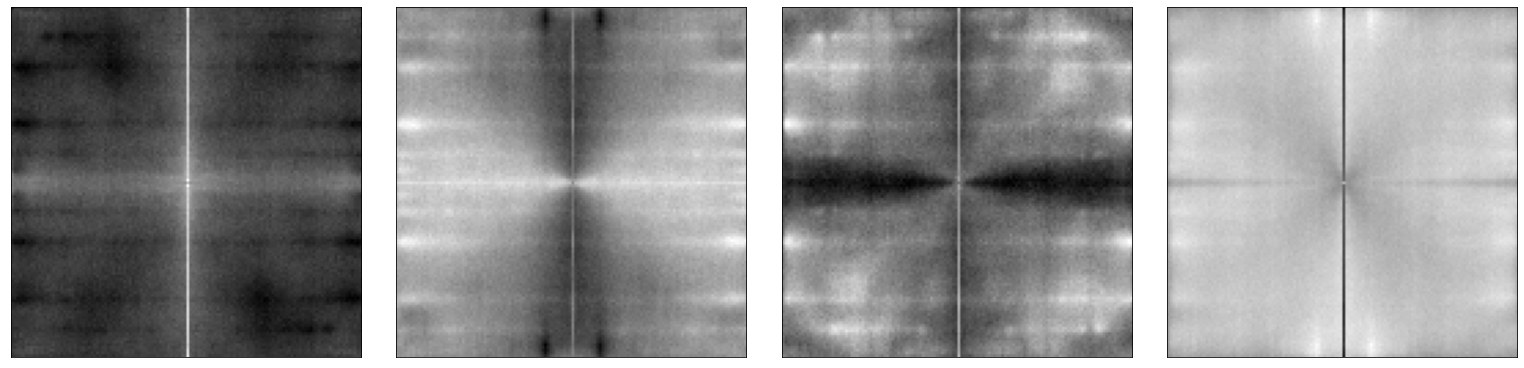

In [71]:
real = '../data/lsun/church_outdoor128/*'
dra = '../results/unshift/lsun-church_outdoor/DRAGAN_128_50_evaluate/*'
w = '../results/unshift/lsun-church_outdoor/WGAN_GP_128_50_evaluate/*'

SPC(real, 128, 5000, 4)
SPC(dra, 128, 5000, 4, [1, -1, 1, 1])
# SPC(w, 128, 5000, 4)


[144.01723753  22.32298955  14.18983728  12.3575612 ]
[172.95017329  24.61199416  13.19815565  10.92790409]


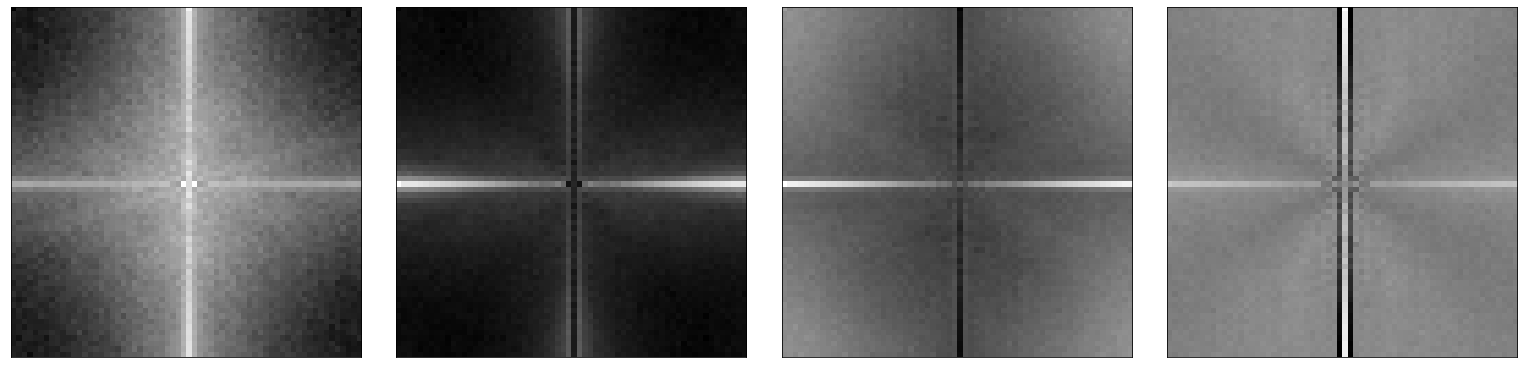

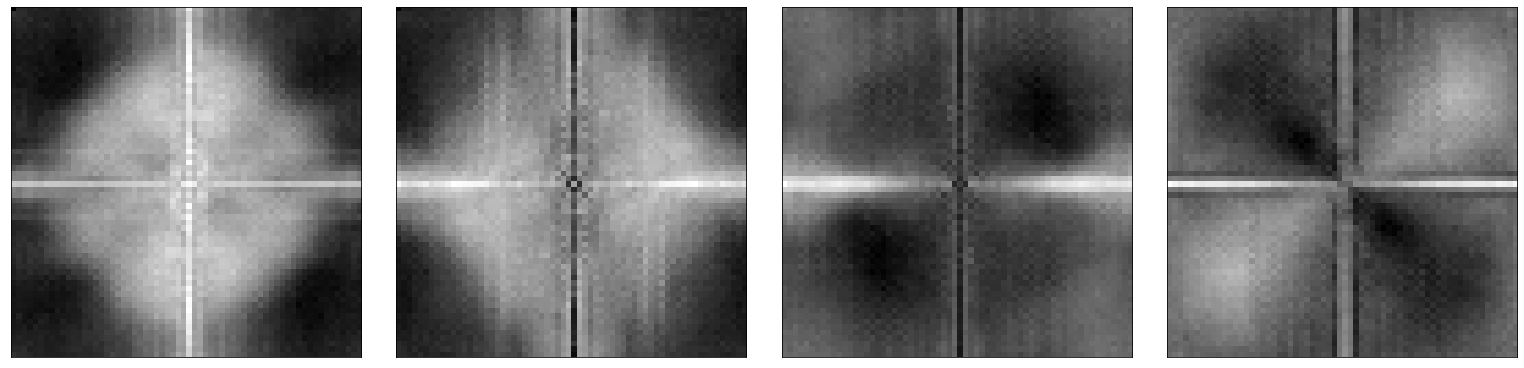

In [73]:
real = '../data/celeba/celeba64/*'
dra = '../results/unshift/celeba/DRAGAN_64_50_evaluate/*'
w = '../results/unshift/celeba/WGAN_GP_64_50_evaluate/*'

SPC(real, 64, 5000, 4)
# SPC(dra, 64, 5000, 4)
SPC(w, 64, 5000, 4, [-1, -1, 1, 1])

[12461.2747578    774.70785206   373.96303767   307.67375637]
[4291.74528907  407.5348536   240.13198361  186.01123861]


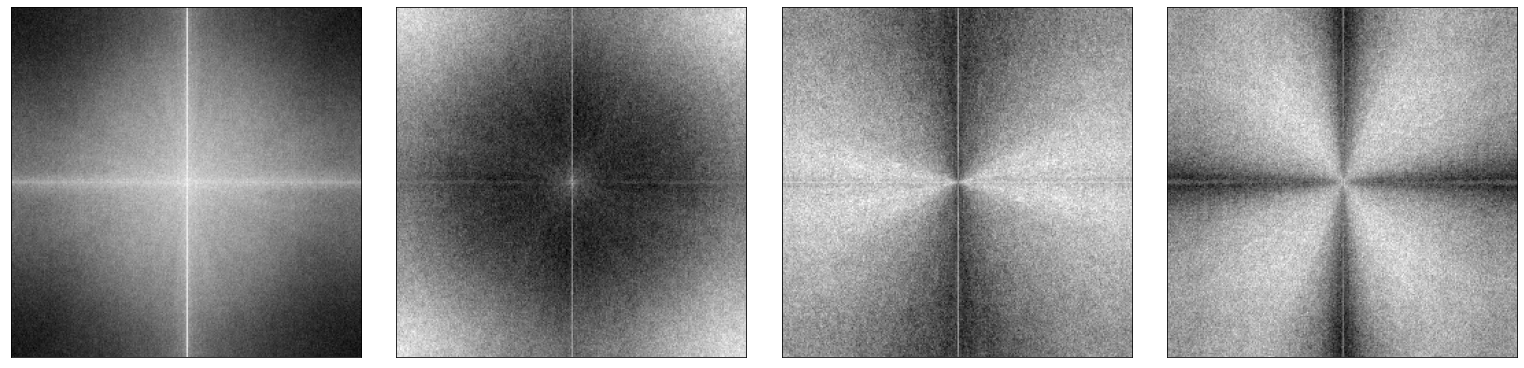

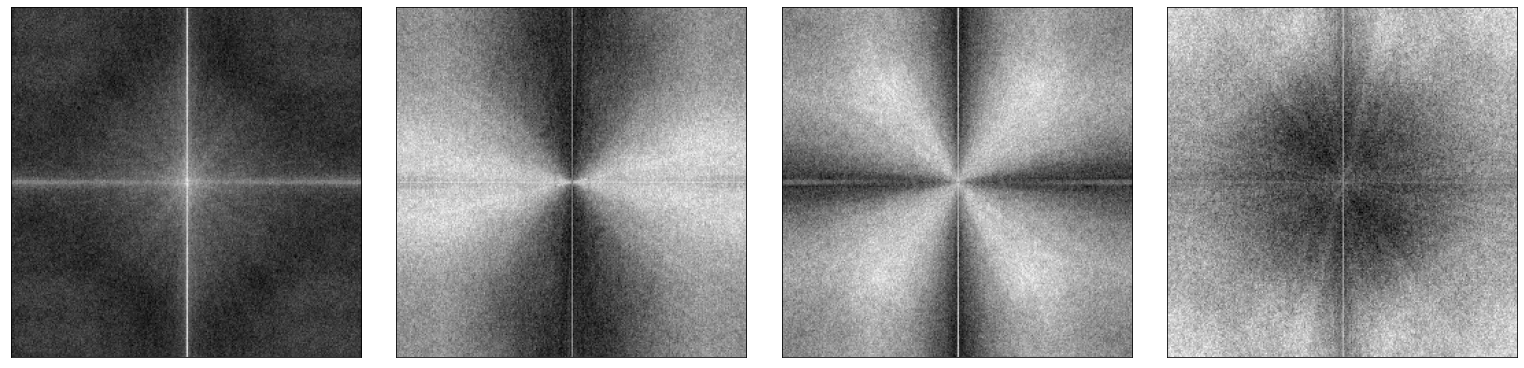

In [48]:
real = '/home/zhangdongyu/mganprior/inversion_input/*'
inv = '/home/zhangdongyu/mganprior/inversion_output/*'

SPC(real, 256, 500, 4)
SPC(inv, 256, 500, 4, [1, 1, -1, 1])

[643.15886388  93.24353095  44.82477886  31.16264811]


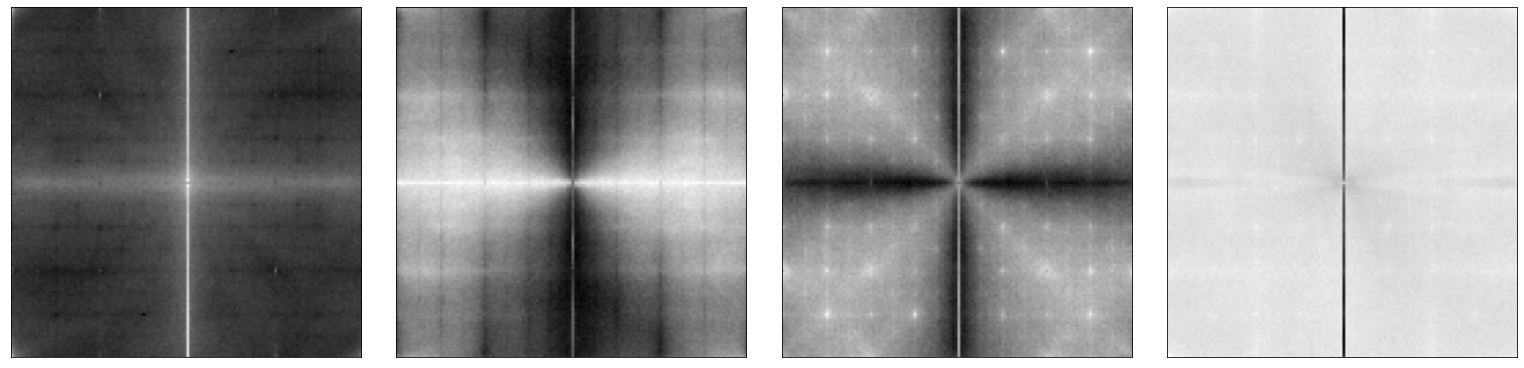

In [4]:
real = '../data/lsun/church_outdoor128/*'
rcg = '../results_deconv/unshift/lsun-church_outdoor/DRAGAN_128_100_evaluate/*'
dcg = '../results/unshift/lsun-church_outdoor/DRAGAN_128_50_evaluate/*'

# SPC(real, 128, 8000, 4)
SPC(rcg, 128, 8000, 4,[1,-1,-1,1])
# SPC(dcg, 128, 8000, 4,[1,-1,1,1])